# Credit card fraud detection

## Imports

In [1]:
# Dataset
import pandas as pd

# Vectorizing and spliting
from sklearn.model_selection import train_test_split

# Classifications
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Preprocessing
from sklearn.preprocessing import MinMaxScaler

from functions.create_classifier import create_classifier, plot_confusion_matrix 
from functions.test_hyperparameters import test_hyperparameters 
from functions.balance_dataset import balance_dataset 

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

## Read files

In [ ]:
!unzip 'data/creditcard.zip' -d 'data'

Archive:  data/creditcard.zip
  inflating: data/creditcard.csv     


In [4]:
df = pd.read_csv("data/creditcard.csv")

In [5]:
X_pca_df = df.drop(['Time', 'Class', 'Amount'], axis=1)[:8000]
y_pca_df = df['Class'][:8000]

In [6]:
y_pca_df.value_counts(normalize=True)

0    0.996875
1    0.003125
Name: Class, dtype: float64

## Balance dataset

Define not balanced dataset

In [7]:
X_pca_not_balanced_03 = X_pca_df
y_pca_not_balanced_03 = y_pca_df

Define balanced dataset

In [8]:
X_pca_balanced_1, y_pca_balanced_1 = balance_dataset(X_pca_df, y_pca_df, 0.011)   # 1%  fraud
X_pca_balanced_10, y_pca_balanced_10 = balance_dataset(X_pca_df, y_pca_df, 0.112) # 10% fraud
X_pca_balanced_20, y_pca_balanced_20 = balance_dataset(X_pca_df, y_pca_df, 0.251) # 20% fraud
X_pca_balanced_30, y_pca_balanced_30 = balance_dataset(X_pca_df, y_pca_df, 0.43)  # 30% fraud
X_pca_balanced_40, y_pca_balanced_40 = balance_dataset(X_pca_df, y_pca_df, 0.667) # 40% fraud
X_pca_balanced_50, y_pca_balanced_50 = balance_dataset(X_pca_df, y_pca_df, 1)     # 50% fraud

In [9]:
y_pca_balanced_1.value_counts(normalize=True)

0    0.989209
1    0.010791
Name: Class, dtype: float64

## Split dataset

In [10]:
X_pca_not_balanced_03_train, X_pca_not_balanced_03_test, y_pca_not_balanced_03_train, y_pca_not_balanced_03_test = train_test_split(X_pca_not_balanced_03, y_pca_not_balanced_03, test_size=0.25, random_state=0)

X_pca_balanced_1_train,  X_pca_balanced_1_test,  y_pca_balanced_1_train,  y_pca_balanced_1_test  = train_test_split(X_pca_balanced_1,  y_pca_balanced_1, test_size=0.25, random_state=0)
X_pca_balanced_10_train, X_pca_balanced_10_test, y_pca_balanced_10_train, y_pca_balanced_10_test = train_test_split(X_pca_balanced_10, y_pca_balanced_10, test_size=0.25, random_state=0)
X_pca_balanced_20_train, X_pca_balanced_20_test, y_pca_balanced_20_train, y_pca_balanced_20_test = train_test_split(X_pca_balanced_20, y_pca_balanced_20, test_size=0.25, random_state=0)
X_pca_balanced_30_train, X_pca_balanced_30_test, y_pca_balanced_30_train, y_pca_balanced_30_test = train_test_split(X_pca_balanced_30, y_pca_balanced_30, test_size=0.25, random_state=0)
X_pca_balanced_40_train, X_pca_balanced_40_test, y_pca_balanced_40_train, y_pca_balanced_40_test = train_test_split(X_pca_balanced_40, y_pca_balanced_40, test_size=0.25, random_state=0)
X_pca_balanced_50_train, X_pca_balanced_50_test, y_pca_balanced_50_train, y_pca_balanced_50_test = train_test_split(X_pca_balanced_50, y_pca_balanced_50, test_size=0.25, random_state=0)

print('X_train.shape', X_pca_balanced_50_train.shape)
print('X_test.shape', X_pca_balanced_50_test.shape)

X_train.shape (11962, 28)
X_test.shape (3988, 28)


## Classifications

### Normalize data for Naive Bayes

In [13]:
scaler = MinMaxScaler()

X_pca_not_balanced_03_train_normalized = scaler.fit(X_pca_not_balanced_03_train).transform(X_pca_not_balanced_03_train)
X_pca_not_balanced_03_test_normalized = scaler.fit(X_pca_not_balanced_03_test).transform(X_pca_not_balanced_03_test)

X_pca_balanced_1_train_normalized = scaler.fit(X_pca_balanced_1_train).transform(X_pca_balanced_1_train)
X_pca_balanced_1_test_normalized = scaler.fit(X_pca_balanced_1_test).transform(X_pca_balanced_1_test)

X_pca_balanced_10_train_normalized = scaler.fit(X_pca_balanced_10_train).transform(X_pca_balanced_10_train)
X_pca_balanced_10_test_normalized = scaler.fit(X_pca_balanced_10_test).transform(X_pca_balanced_10_test)

X_pca_balanced_20_train_normalized = scaler.fit(X_pca_balanced_20_train).transform(X_pca_balanced_20_train)
X_pca_balanced_20_test_normalized = scaler.fit(X_pca_balanced_20_test).transform(X_pca_balanced_20_test)

X_pca_balanced_30_train_normalized = scaler.fit(X_pca_balanced_30_train).transform(X_pca_balanced_30_train)
X_pca_balanced_30_test_normalized = scaler.fit(X_pca_balanced_30_test).transform(X_pca_balanced_30_test)

X_pca_balanced_40_train_normalized = scaler.fit(X_pca_balanced_40_train).transform(X_pca_balanced_40_train)
X_pca_balanced_40_test_normalized = scaler.fit(X_pca_balanced_40_test).transform(X_pca_balanced_40_test)

X_pca_balanced_50_train_normalized = scaler.fit(X_pca_balanced_50_train).transform(X_pca_balanced_50_train)
X_pca_balanced_50_test_normalized = scaler.fit(X_pca_balanced_50_test).transform(X_pca_balanced_50_test)

### Test Hyperparameters

#### PCA unbalanced (0.3% fraud)

In [ ]:
test_hyperparameters('Naive Bayes', X_pca_not_balanced_03_train_normalized,
                     y_pca_not_balanced_03_train, 'X_pca_not_balanced_03')
test_hyperparameters('Support Vector Machine', X_pca_not_balanced_03_train,
                     y_pca_not_balanced_03_train, 'X_pca_not_balanced_03')
test_hyperparameters('Random Forest', X_pca_not_balanced_03_train,
                     y_pca_not_balanced_03_train, 'X_pca_not_balanced_03')

## Results
# Best hyperparameters for Naive Bayes: {'alpha': 1}
# Best hyperparameters for Support Vector Machine: {'C': 1, 'kernel': 'poly'}
# Best hyperparameters for Random Forest: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 100}

#### PCA unbalanced (1% fraud)

In [ ]:
test_hyperparameters('Naive Bayes', X_pca_balanced_1_train_normalized,
                     y_pca_balanced_1_train, 'X_pca_balanced_1')
test_hyperparameters('Support Vector Machine', X_pca_balanced_1_train,
                     y_pca_balanced_1_train, 'X_pca_balanced_1')
test_hyperparameters('Random Forest', X_pca_balanced_1_train,
                     y_pca_balanced_1_train, 'X_pca_balanced_1')

## Results
# Best hyperparameters for Naive Bayes: {'alpha': 1}
# Best hyperparameters for Support Vector Machine: {'C': 1, 'kernel': 'linear'}
# Best hyperparameters for Random Forest: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}

#### PCA unbalanced (10% fraud)

In [ ]:
test_hyperparameters('Naive Bayes', X_pca_balanced_10_train_normalized,
                     y_pca_balanced_10_train, 'X_pca_balanced_10')
test_hyperparameters('Support Vector Machine', X_pca_balanced_10_train,
                     y_pca_balanced_10_train, 'X_pca_balanced_10')
test_hyperparameters('Random Forest', X_pca_balanced_10_train,
                     y_pca_balanced_10_train, 'X_pca_balanced_10')

## Results
# Best hyperparameters for Naive Bayes: {'alpha': 1}
# Best hyperparameters for Support Vector Machine: {'C': 1, 'kernel': 'rbf'}
# Best hyperparameters for Random Forest: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}

#### PCA unbalanced (20% fraud)

In [ ]:
test_hyperparameters('Naive Bayes', X_pca_balanced_20_train_normalized,
                     y_pca_balanced_20_train, 'X_pca_balanced_20')
test_hyperparameters('Support Vector Machine', X_pca_balanced_20_train,
                     y_pca_balanced_20_train, 'X_pca_balanced_20')
test_hyperparameters('Random Forest', X_pca_balanced_20_train,
                     y_pca_balanced_20_train, 'X_pca_balanced_20')

## Results
# Best hyperparameters for Naive Bayes: {'alpha': 1}
# Best hyperparameters for Support Vector Machine: {'C': 1, 'kernel': 'rbf'}
# Best hyperparameters for Random Forest: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 100}

#### PCA unbalanced (30% fraud)

In [ ]:

test_hyperparameters('Naive Bayes', X_pca_balanced_30_train_normalized,
                     y_pca_balanced_30_train, 'X_pca_balanced_30')
test_hyperparameters('Support Vector Machine', X_pca_balanced_30_train,
                     y_pca_balanced_30_train, 'X_pca_balanced_30')
test_hyperparameters('Random Forest', X_pca_balanced_30_train,
                     y_pca_balanced_30_train, 'X_pca_balanced_30')

## Results
# Best hyperparameters for Naive Bayes: {'alpha': 1}
# Best hyperparameters for Support Vector Machine: {'C': 1, 'kernel': 'rbf'}
# Best hyperparameters for Random Forest: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 100}

#### PCA unbalanced (40% fraud)

In [ ]:
test_hyperparameters('Naive Bayes', X_pca_balanced_40_train_normalized,
                     y_pca_balanced_40_train, 'X_pca_balanced_40')
test_hyperparameters('Support Vector Machine', X_pca_balanced_40_train,
                     y_pca_balanced_40_train, 'X_pca_balanced_40')
test_hyperparameters('Random Forest', X_pca_balanced_40_train,
                     y_pca_balanced_40_train, 'X_pca_balanced_40')

## Results
# Best hyperparameters for Naive Bayes: {'alpha': 1}
# Best hyperparameters for Support Vector Machine: {'C': 100, 'kernel': 'poly'}
# Best hyperparameters for Random Forest: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 100}

#### PCA unbalanced (50% fraud)

In [ ]:
test_hyperparameters('Naive Bayes', X_pca_balanced_50_train_normalized,
                     y_pca_balanced_50_train, 'X_pca_balanced_50')
test_hyperparameters('Support Vector Machine', X_pca_balanced_50_train,
                     y_pca_balanced_50_train, 'X_pca_balanced_50')
test_hyperparameters('Random Forest', X_pca_balanced_50_train,
                     y_pca_balanced_50_train, 'X_pca_balanced_50')
## Results
# Best hyperparameters for Naive Bayes: {'alpha': 1}
# Best hyperparameters for Support Vector Machine: {'C': 10, 'kernel': 'rbf'}
# Best hyperparameters for Random Forest: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 100}

### Classification

- Support Vector Machine
- Random Forest
- Naive Bayes

#### PCA unbalanced (0.3% fraud)


Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1988
           1       1.00      0.00      0.00        12

    accuracy                           0.99      2000
   macro avg       1.00      0.50      0.50      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix: 


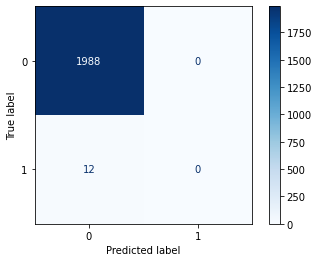

In [14]:
nb_clf = MultinomialNB(alpha=1)

y_pred = create_classifier(nb_clf, X_pca_not_balanced_03_train_normalized, y_pca_not_balanced_03_train, 
                          X_pca_not_balanced_03_test_normalized, y_pca_not_balanced_03_test)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_pca_not_balanced_03_test_normalized, y_pca_not_balanced_03_test)

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1988
           1       0.90      0.75      0.82        12

    accuracy                           1.00      2000
   macro avg       0.95      0.87      0.91      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


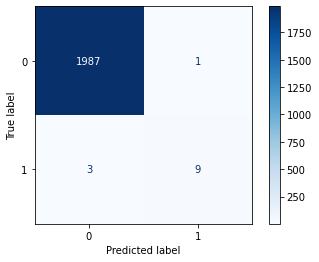

In [22]:
svm_clf = SVC(kernel='poly', C=1)

y_pred = create_classifier(svm_clf, X_pca_not_balanced_03_train, y_pca_not_balanced_03_train, 
                          X_pca_not_balanced_03_test, y_pca_not_balanced_03_test)
                          
print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_pca_not_balanced_03_test, y_pca_not_balanced_03_test)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1988
           1       1.00      0.67      0.80        12

    accuracy                           1.00      2000
   macro avg       1.00      0.83      0.90      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix: 


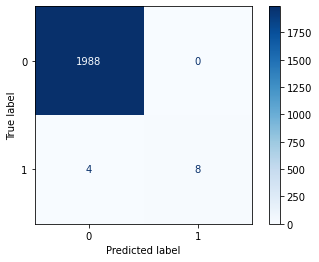

In [23]:
rf_clf = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=3, criterion='gini')

y_pred = create_classifier(rf_clf, X_pca_not_balanced_03_train, y_pca_not_balanced_03_train, 
                          X_pca_not_balanced_03_test, y_pca_not_balanced_03_test)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_pca_not_balanced_03_test, y_pca_not_balanced_03_test)

#### PCA balanced (1% fraud)

Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1995
           1       1.00      0.00      0.00        21

    accuracy                           0.99      2016
   macro avg       0.99      0.50      0.50      2016
weighted avg       0.99      0.99      0.98      2016

Confusion Matrix: 


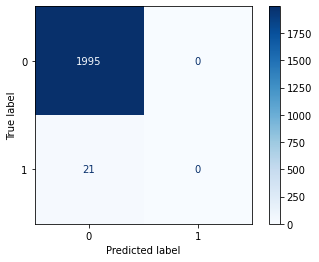

In [15]:
nb_clf = MultinomialNB(alpha=1)

y_pred = create_classifier(nb_clf, X_pca_balanced_1_train_normalized, y_pca_balanced_1_train, 
                          X_pca_balanced_1_test_normalized, y_pca_balanced_1_test)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_pca_balanced_1_test_normalized, y_pca_balanced_1_test)

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1995
           1       0.81      1.00      0.89        21

    accuracy                           1.00      2016
   macro avg       0.90      1.00      0.95      2016
weighted avg       1.00      1.00      1.00      2016

Confusion Matrix: 


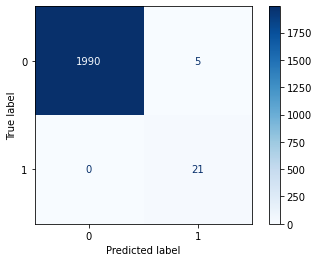

In [17]:
svm_clf = SVC(kernel='linear', C=1)

y_pred = create_classifier(svm_clf, X_pca_balanced_1_train, y_pca_balanced_1_train, 
                          X_pca_balanced_1_test, y_pca_balanced_1_test)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_pca_balanced_1_test, y_pca_balanced_1_test)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1995
           1       1.00      1.00      1.00        21

    accuracy                           1.00      2016
   macro avg       1.00      1.00      1.00      2016
weighted avg       1.00      1.00      1.00      2016

Confusion Matrix: 


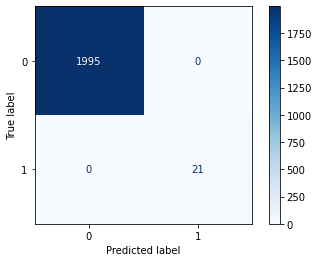

In [18]:
rf_clf = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=5, criterion='gini')

y_pred = create_classifier(rf_clf, X_pca_balanced_1_train, y_pca_balanced_1_train, 
                          X_pca_balanced_1_test, y_pca_balanced_1_test)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_pca_balanced_1_test, y_pca_balanced_1_test)

#### PCA balanced (10% fraud)

Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2008
           1       1.00      0.04      0.07       209

    accuracy                           0.91      2217
   macro avg       0.95      0.52      0.51      2217
weighted avg       0.92      0.91      0.87      2217

Confusion Matrix: 


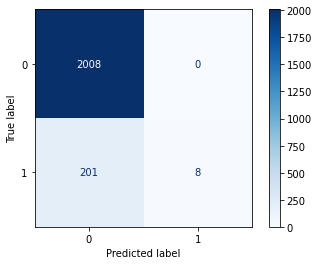

In [19]:
nb_clf = MultinomialNB(alpha=1)

y_pred = create_classifier(nb_clf, X_pca_balanced_10_train_normalized, y_pca_balanced_10_train, 
                          X_pca_balanced_10_test_normalized, y_pca_balanced_10_test)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_pca_balanced_10_test_normalized, y_pca_balanced_10_test)

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2008
           1       1.00      1.00      1.00       209

    accuracy                           1.00      2217
   macro avg       1.00      1.00      1.00      2217
weighted avg       1.00      1.00      1.00      2217

Confusion Matrix: 


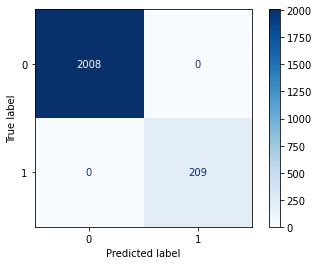

In [20]:
svm_clf = SVC(kernel='rbf', C=1)

y_pred = create_classifier(svm_clf, X_pca_balanced_10_train, y_pca_balanced_10_train, 
                          X_pca_balanced_10_test, y_pca_balanced_10_test)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_pca_balanced_10_test, y_pca_balanced_10_test)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2008
           1       1.00      1.00      1.00       209

    accuracy                           1.00      2217
   macro avg       1.00      1.00      1.00      2217
weighted avg       1.00      1.00      1.00      2217

Confusion Matrix: 


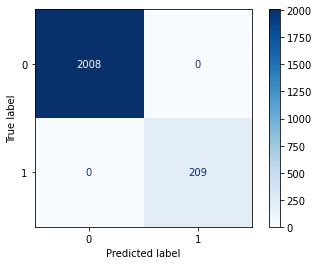

In [21]:
rf_clf = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=5, criterion='gini')

y_pred = create_classifier(rf_clf, X_pca_balanced_10_train, y_pca_balanced_10_train, 
                          X_pca_balanced_10_test, y_pca_balanced_10_test)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_pca_balanced_10_test, y_pca_balanced_10_test)

#### PCA balanced (20% fraud)

Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1979
           1       1.00      0.39      0.57       515

    accuracy                           0.87      2494
   macro avg       0.93      0.70      0.75      2494
weighted avg       0.89      0.87      0.85      2494

Confusion Matrix: 


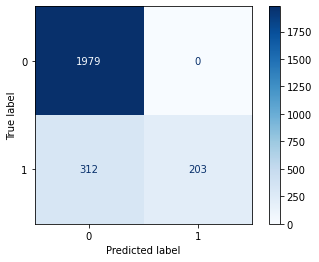

In [33]:
nb_clf = MultinomialNB(alpha=1)

y_pred = create_classifier(nb_clf, X_pca_balanced_20_train_normalized, y_pca_balanced_20_train, 
                          X_pca_balanced_20_test_normalized, y_pca_balanced_20_test)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_pca_balanced_20_test_normalized, y_pca_balanced_20_test)

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1979
           1       1.00      1.00      1.00       515

    accuracy                           1.00      2494
   macro avg       1.00      1.00      1.00      2494
weighted avg       1.00      1.00      1.00      2494

Confusion Matrix: 


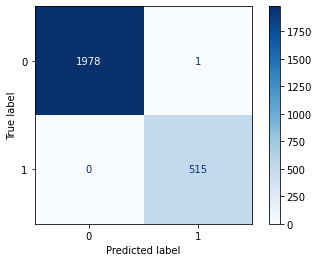

In [34]:
svm_clf = SVC(kernel='rbf', C=1)

y_pred = create_classifier(svm_clf, X_pca_balanced_20_train, y_pca_balanced_20_train, 
                          X_pca_balanced_20_test, y_pca_balanced_20_test)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_pca_balanced_20_test, y_pca_balanced_20_test)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1979
           1       1.00      0.97      0.98       515

    accuracy                           0.99      2494
   macro avg       1.00      0.98      0.99      2494
weighted avg       0.99      0.99      0.99      2494

Confusion Matrix: 


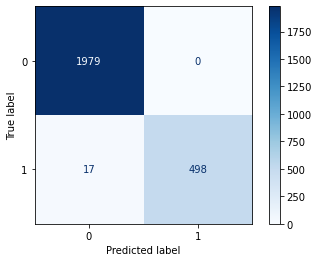

In [35]:
rf_clf = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=3, criterion='gini')

y_pred = create_classifier(rf_clf, X_pca_balanced_20_train, y_pca_balanced_20_train, 
                          X_pca_balanced_20_test, y_pca_balanced_20_test)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_pca_balanced_20_test, y_pca_balanced_20_test)

#### PCA balanced (30% fraud)

Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1982
           1       1.00      0.68      0.81       869

    accuracy                           0.90      2851
   macro avg       0.94      0.84      0.87      2851
weighted avg       0.92      0.90      0.90      2851

Confusion Matrix: 


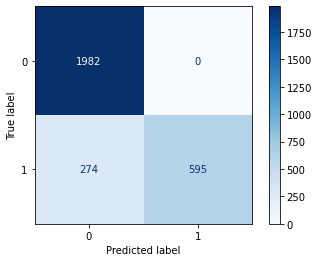

In [32]:
nb_clf = MultinomialNB(alpha=1)

y_pred = create_classifier(nb_clf, X_pca_balanced_30_train_normalized, y_pca_balanced_30_train, 
                          X_pca_balanced_30_test_normalized, y_pca_balanced_30_test)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_pca_balanced_30_test_normalized, y_pca_balanced_30_test)

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1982
           1       1.00      1.00      1.00       869

    accuracy                           1.00      2851
   macro avg       1.00      1.00      1.00      2851
weighted avg       1.00      1.00      1.00      2851

Confusion Matrix: 


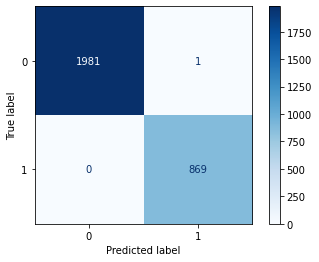

In [31]:
svm_clf = SVC(kernel='rbf', C=1)

y_pred = create_classifier(svm_clf, X_pca_balanced_30_train, y_pca_balanced_30_train, 
                          X_pca_balanced_30_test, y_pca_balanced_30_test)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_pca_balanced_30_test, y_pca_balanced_30_test)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1982
           1       1.00      1.00      1.00       869

    accuracy                           1.00      2851
   macro avg       1.00      1.00      1.00      2851
weighted avg       1.00      1.00      1.00      2851

Confusion Matrix: 


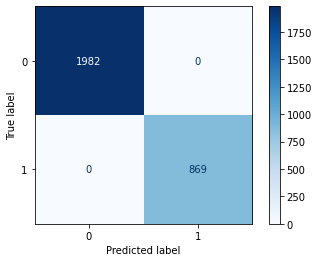

In [30]:
rf_clf = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=3, criterion='gini')

y_pred = create_classifier(rf_clf, X_pca_balanced_30_train, y_pca_balanced_30_train, 
                          X_pca_balanced_30_test, y_pca_balanced_30_test)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_pca_balanced_30_test, y_pca_balanced_30_test)

#### PCA balanced (40% fraud)

Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1955
           1       1.00      0.80      0.89      1369

    accuracy                           0.92      3324
   macro avg       0.94      0.90      0.91      3324
weighted avg       0.93      0.92      0.92      3324

Confusion Matrix: 


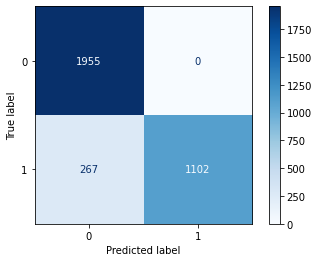

In [27]:
nb_clf = MultinomialNB(alpha=1)

y_pred = create_classifier(nb_clf, X_pca_balanced_40_train_normalized, y_pca_balanced_40_train, 
                          X_pca_balanced_40_test_normalized, y_pca_balanced_40_test)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_pca_balanced_40_test_normalized, y_pca_balanced_40_test)

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1955
           1       1.00      1.00      1.00      1369

    accuracy                           1.00      3324
   macro avg       1.00      1.00      1.00      3324
weighted avg       1.00      1.00      1.00      3324

Confusion Matrix: 


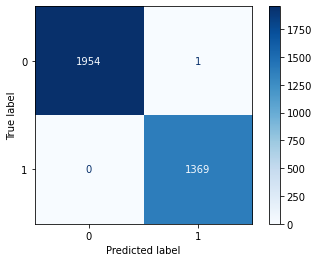

In [28]:
svm_clf = SVC(kernel='poly', C=100)

y_pred = create_classifier(svm_clf, X_pca_balanced_40_train, y_pca_balanced_40_train, 
                          X_pca_balanced_40_test, y_pca_balanced_40_test)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_pca_balanced_40_test, y_pca_balanced_40_test)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1955
           1       1.00      1.00      1.00      1369

    accuracy                           1.00      3324
   macro avg       1.00      1.00      1.00      3324
weighted avg       1.00      1.00      1.00      3324

Confusion Matrix: 


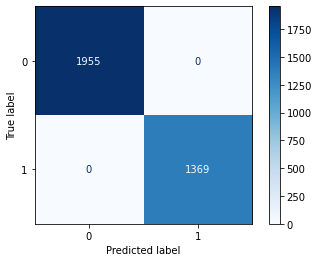

In [29]:
rf_clf = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=3, criterion='gini')

y_pred = create_classifier(rf_clf, X_pca_balanced_40_train, y_pca_balanced_40_train, 
                          X_pca_balanced_40_test, y_pca_balanced_40_test)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_pca_balanced_40_test, y_pca_balanced_40_test)

#### PCA balanced (50% fraud)

Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1960
           1       1.00      0.85      0.92      2028

    accuracy                           0.92      3988
   macro avg       0.93      0.93      0.92      3988
weighted avg       0.93      0.92      0.92      3988

Confusion Matrix: 


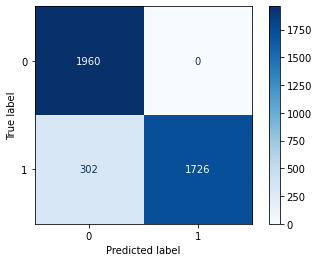

In [25]:
nb_clf = MultinomialNB(alpha=1)

y_pred = create_classifier(nb_clf, X_pca_balanced_50_train_normalized, y_pca_balanced_50_train, 
                          X_pca_balanced_50_test_normalized, y_pca_balanced_50_test)

print('Confusion Matrix: ')
plot_confusion_matrix(nb_clf, X_pca_balanced_50_test_normalized, y_pca_balanced_50_test)

Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1960
           1       1.00      1.00      1.00      2028

    accuracy                           1.00      3988
   macro avg       1.00      1.00      1.00      3988
weighted avg       1.00      1.00      1.00      3988

Confusion Matrix: 


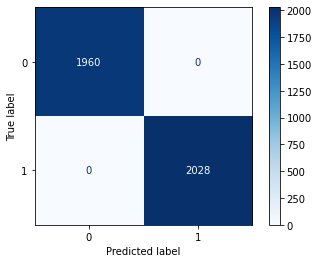

In [24]:
svm_clf = SVC(kernel='rbf', C=10)

y_pred = create_classifier(svm_clf, X_pca_balanced_50_train, y_pca_balanced_50_train, 
                          X_pca_balanced_50_test, y_pca_balanced_50_test)

print('Confusion Matrix: ')
plot_confusion_matrix(svm_clf, X_pca_balanced_50_test, y_pca_balanced_50_test)

Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1960
           1       1.00      1.00      1.00      2028

    accuracy                           1.00      3988
   macro avg       1.00      1.00      1.00      3988
weighted avg       1.00      1.00      1.00      3988

Confusion Matrix: 


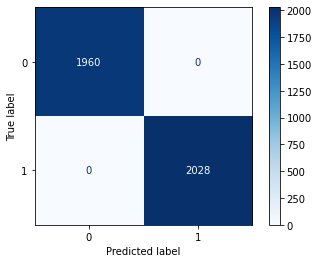

In [26]:
rf_clf = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=3, criterion='gini')

y_pred = create_classifier(rf_clf, X_pca_balanced_50_train, y_pca_balanced_50_train, 
                          X_pca_balanced_50_test, y_pca_balanced_50_test)

print('Confusion Matrix: ')
plot_confusion_matrix(rf_clf, X_pca_balanced_50_test, y_pca_balanced_50_test)

#### Results

In [102]:
x_axis = ['0.3%', '1%', '10%', '20%', '30%', '40%', '50%']

fig = make_subplots(rows=1, cols=3, shared_xaxes=True, subplot_titles=['Fraud', 'Not fraud', 'Accuracy'], x_title='Balanced (%)', y_title='F1-score')

fig.add_traces([go.Scatter(x=x_axis, y=[0, 0, 0.07, 0.57, 0.81, 0.89, 0.92], name='Naive Bayes', line=dict(color="#46C756")),
                go.Scatter(x=x_axis, y=[0.82, 0.89, 1, 1, 1, 1, 1], name='Support Vector Machine', line=dict(color="#FF69B4")),
                go.Scatter(x=x_axis, y=[0.8, 1, 1, 0.98, 1, 1, 1], name='Random Forest', line=dict(color="#2E7890"))], rows=[1,1,1], cols=[1,1,1])

fig.add_traces([go.Scatter(x=x_axis, y=[1, 0.99, 0.95, 0.93, 0.94, 0.94, 0.93], line=dict(color="#46C756"), showlegend=False),
                go.Scatter(x=x_axis, y=[1, 1, 1, 1, 1, 1, 1], line=dict(color="#FF69B4"), showlegend=False),
                go.Scatter(x=x_axis, y=[1, 1, 1, 1, 1, 1, 1], line=dict(color="#2E7890"), showlegend=False)], rows=[1,1,1], cols=[2,2,2])

fig.add_traces([go.Scatter(x=x_axis, y=[0.99, 0.99, 0.91, 0.87, 0.90, 0.92, 0.92], line=dict(color="#46C756"), showlegend=False),
                go.Scatter(x=x_axis, y=[1, 1, 1, 1, 1, 1, 1], line=dict(color="#FF69B4"), showlegend=False),
                go.Scatter(x=x_axis, y=[1, 1, 1, 0.99, 1, 1, 1], line=dict(color="#2E7890"), showlegend=False)], rows=[1,1,1], cols=[3,3,3])

fig.update_layout(
plot_bgcolor = 'white',
font = {'family': 'Arial','size': 14,'color': '#37363d'})

fig.update_xaxes( showgrid=True, gridwidth=1, gridcolor='lightgray',
showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray',
showline=True, linewidth=1, linecolor='black')

fig.show()

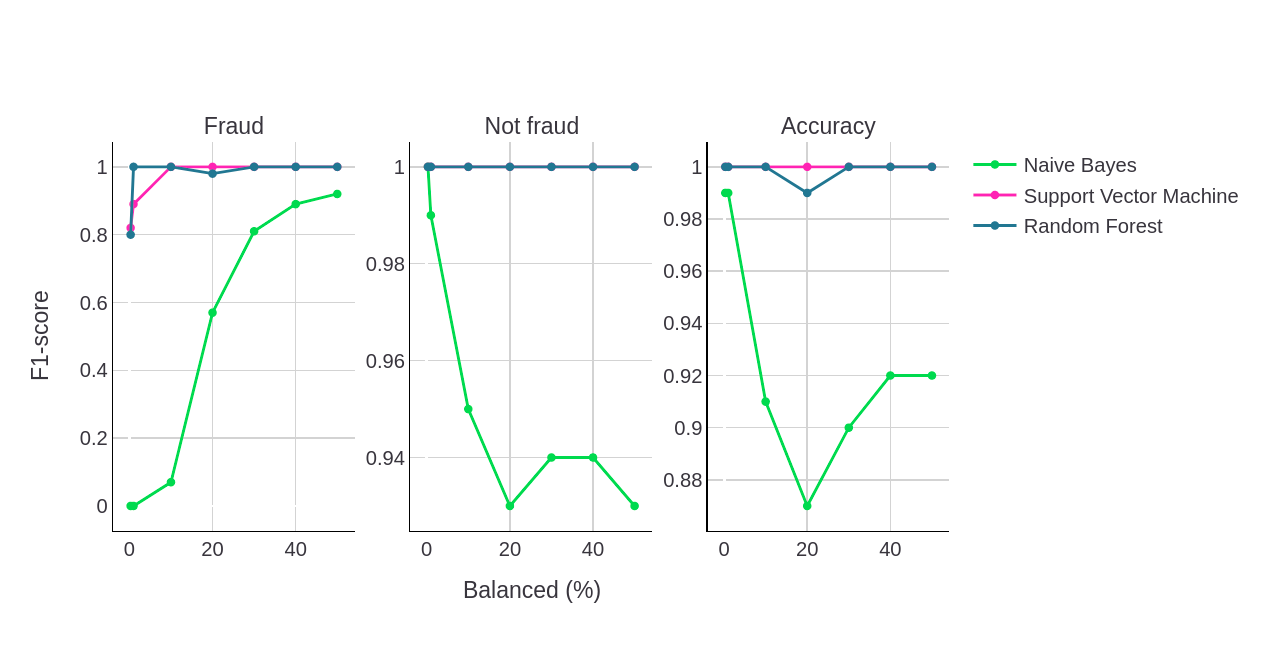

In [2]:
classification_results = Image.open('results/classification_results.png')
classification_results